# Análise do Data Warehouse - (Cursos Superior, Faixa Etária, Brasil)

Análise dos dados disponibilizados no Data Warehouse



**Instalando o Cassandra no Jupyter**

`docker-compose exec jupyter pip install cassandra-driver`

## Imports

In [1]:
#Imports
from time import sleep

In [2]:
#Imports Cassandra
from cassandra.auth import PlainTextAuthProvider
from cassandra.cluster import Cluster

In [3]:
#Imports Pandas
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
def pandas_factory(colnames, rows):
    return pd.DataFrame(rows, columns=colnames)

## Conexão ao banco de Dados Cassandra

In [4]:
#Conectando a seção
ap = PlainTextAuthProvider(username='cassandra', password='cassandra')
cluster = Cluster(['cassandra'], protocol_version=4, auth_provider=ap)
session = cluster.connect('alunos')
session.default_timeout = 60
session.row_factory = pandas_factory
sleep(2)

## Consulta

In [5]:
table = 'fato_aluno_etaria'
field = 'faixa_etaria'
curse_types = ['Bacharelado','Licenciatura','Tecnologia']
filters = {    
    'categoria_situacao': ['Evadidos','Concluintes'],
    'tipo_curso':'',
    #'unidade_ensino': '',
    #'instituicao': '',
}

In [6]:
s = []
fields_sql = ""
for k, v in filters.items():
    if v :
        if type(v) is str:
            s.append("({} = '{}')".format(k,v))
            fields_sql = fields_sql + ', k'
        elif type(v) is list:
            s.append("({} IN ({}))".format(
                k,
                ','.join(map(str,["'{}'".format(i) for i in v]))))
filter_sql = " AND ".join(map(str,s))


In [7]:
sql = "SELECT categoria_situacao, {0}, tipo_curso, instituicao, unidade_ensino, sum(quant_grupo) AS quant_grupo" \
" FROM {1} " \
" WHERE {2} " \
" GROUP BY categoria_situacao, {0} {3}" \
" ALLOW FILTERING;".format(
    field, 
    table,
    filter_sql,
    fields_sql)
rslt = session.execute(sql, timeout=None)
df = rslt._current_rows
df

,categoria_situacao,faixa_etaria,tipo_curso,instituicao,unidade_ensino,quant_grupo
0,Concluintes,15 a 19 anos,Bacharelado,CEFET-RJ,Unidade Maracanã,116364
1,Concluintes,20 a 24 anos,Bacharelado,CEFET-MG,Uned Araxá,84362
2,Concluintes,25 a 29 anos,Bacharelado,CEFET-MG,Uned Araxá,52538
3,Concluintes,30 a 34 anos,Bacharelado,CEFET-MG,Uned Araxá,38693
4,Concluintes,35 a 39 anos,Bacharelado,CEFET-MG,Uned Leopoldina,30015
5,Concluintes,40 a 44 anos,Bacharelado,CEFET-MG,Uned Araxá,20519
6,Concluintes,45 a 49 anos,Bacharelado,CEFET-MG,Unidade Belo Horizonte,13723
7,Concluintes,50 a 54 anos,Bacharelado,CEFET-MG,Unidade Belo Horizonte,9392
8,Concluintes,55 a 59 anos,Bacharelado,CEFET-MG,Unidade Belo Horizonte,5459
9,Concluintes,Maior de 60 anos,Bacharelado,IF BAIANO,Campus Guanambi,5222


## Filtrando Tipo do Curso

In [8]:
if curse_types :
    df = df[df['tipo_curso'].isin(curse_types)]
    print('Fitrando pelos tipos de cursos:\n {}'.format(', '.join(map(str,curse_types))))
    
else:
    print('Todos os cursos')
df

Fitrando pelos tipos de cursos:
 Bacharelado, Licenciatura, Tecnologia


,categoria_situacao,faixa_etaria,tipo_curso,instituicao,unidade_ensino,quant_grupo
0,Concluintes,15 a 19 anos,Bacharelado,CEFET-RJ,Unidade Maracanã,116364
1,Concluintes,20 a 24 anos,Bacharelado,CEFET-MG,Uned Araxá,84362
2,Concluintes,25 a 29 anos,Bacharelado,CEFET-MG,Uned Araxá,52538
3,Concluintes,30 a 34 anos,Bacharelado,CEFET-MG,Uned Araxá,38693
4,Concluintes,35 a 39 anos,Bacharelado,CEFET-MG,Uned Leopoldina,30015
5,Concluintes,40 a 44 anos,Bacharelado,CEFET-MG,Uned Araxá,20519
6,Concluintes,45 a 49 anos,Bacharelado,CEFET-MG,Unidade Belo Horizonte,13723
7,Concluintes,50 a 54 anos,Bacharelado,CEFET-MG,Unidade Belo Horizonte,9392
8,Concluintes,55 a 59 anos,Bacharelado,CEFET-MG,Unidade Belo Horizonte,5459
9,Concluintes,Maior de 60 anos,Bacharelado,IF BAIANO,Campus Guanambi,5222


## Agrupando

In [9]:
df = df.groupby(['categoria_situacao',field]).sum('quant_grupo').reset_index()

<AxesSubplot:xlabel='faixa_etaria'>

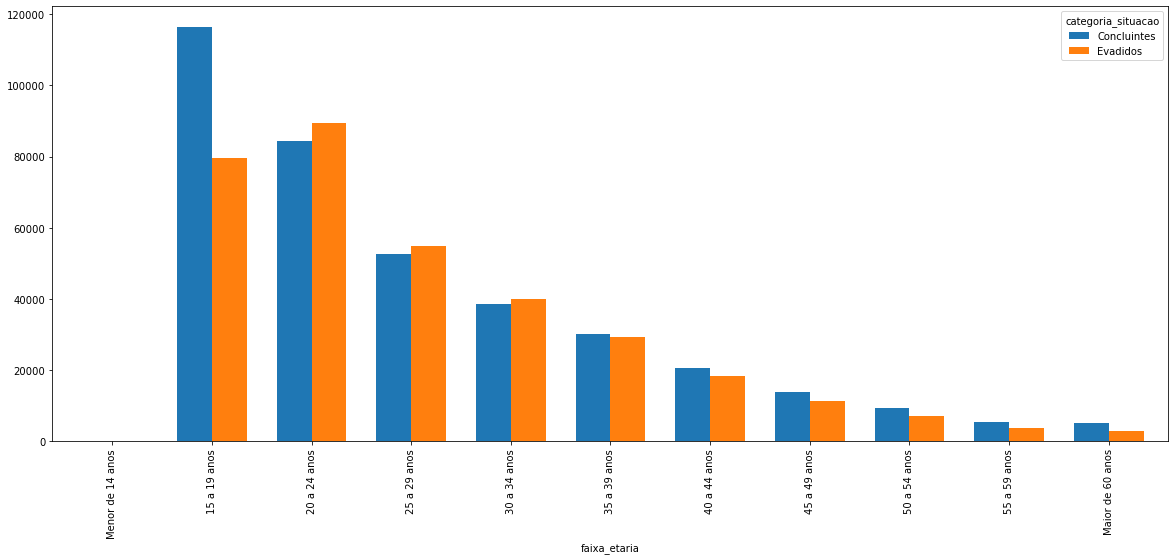

In [10]:
x = df.pivot_table('quant_grupo',[field],'categoria_situacao')
#x = df.pivot_table('quant_grupo',['categoria_situacao'],field)
order = [
    'Menor de 14 anos', '15 a 19 anos','20 a 24 anos',
    '25 a 29 anos','30 a 34 anos','35 a 39 anos',
    '40 a 44 anos','45 a 49 anos', '50 a 54 anos','55 a 59 anos',
    'Maior de 60 anos']
x.reindex(order).plot(kind ='bar', figsize=(20, 8), width = 0.7)

## Total de Alunos

In [11]:
#df[field]
df.groupby([field]).sum('quant_grupo')['quant_grupo'].reindex(order)

faixa_etaria
Menor de 14 anos         NaN
15 a 19 anos        195992.0
20 a 24 anos        173868.0
25 a 29 anos        107491.0
30 a 34 anos         78553.0
35 a 39 anos         59448.0
40 a 44 anos         38726.0
45 a 49 anos         24989.0
50 a 54 anos         16420.0
55 a 59 anos          9256.0
Maior de 60 anos      8003.0
Name: quant_grupo, dtype: float64

In [12]:
categorias = list(df['categoria_situacao'].unique())
total = df['quant_grupo'].sum()
x = df.pivot_table('quant_grupo',index=[field],columns='categoria_situacao').reset_index()
x['total'] = x[categorias].sum(axis=1)
for categoria in categorias:
    x[categoria + '_%'] = x[categoria] / x['total']
x['total_%'] = x['total'] / total
x.sort_values(by=['total_%'], ascending=False)

categoria_situacao,faixa_etaria,Concluintes,Evadidos,total,Concluintes_%,Evadidos_%,total_%
0,15 a 19 anos,116364,79628,195992,0.593718,0.406282,0.274982
1,20 a 24 anos,84362,89506,173868,0.485207,0.514793,0.243941
2,25 a 29 anos,52538,54953,107491,0.488767,0.511233,0.150812
3,30 a 34 anos,38693,39860,78553,0.492572,0.507428,0.110212
4,35 a 39 anos,30015,29433,59448,0.504895,0.495105,0.083407
5,40 a 44 anos,20519,18207,38726,0.529851,0.470149,0.054334
6,45 a 49 anos,13723,11266,24989,0.549162,0.450838,0.035060
7,50 a 54 anos,9392,7028,16420,0.571985,0.428015,0.023038
8,55 a 59 anos,5459,3797,9256,0.589780,0.410220,0.012986
9,Maior de 60 anos,5222,2781,8003,0.652505,0.347495,0.011228


In [13]:
print("Total de alunos: {:,}".format(df['quant_grupo'].sum()).replace(',','.'))

Total de aluns: 712.746
